In [1]:
import pandas as pd

In [2]:
census_data = pd.read_csv('../data/census.csv')

In [3]:
import pandas_profiling

from markupsafe import escape

# produces a pandas profiling report of the sample dataframe
profile = pandas_profiling.ProfileReport(census_data)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

# Analyzing the results of profiling with pandas

## General

There are about 32,5k data observations, and the following variables 

## Variables

* _age_ is a numerical field, continous, never missing, meaning clear
* _workclass_ is a categorical value in text fields, with low cardinality, empty for 1800 records
* _fnlgt_ is a numerical field ranging from 12285 to 1484705, always defined, possibly the income, meaning unclear
* _education_ is a categorical text value for the education type
* _education_num_ is a numerical value ranging from 1 to 16, possibly the number of years spent in education
* _marital_status_ is a categorical text value for the marital status, low cardinality
* _occupation_ is a categorical text value for the marital status, middle cardinality. Some are empty
* _relationship_ is a categorical text value for the relationship status, low cardinality
* _race_ is a categorical text value for the race, low cardinality
* _capital_gain_ is a numerical value ranging from 0 to 99999, with many null values (91,7%)
* _capital_loss_ is a numerical value ranging from 0 to 4356, with many null values (95,3%)
* _hours_per_week_ is a numerical value ranging from 0 to 99, with no empty values
* _native_country_ is a text value for the country of origin, with few empty values (?)
* _salary_ is a categorical value indicating if the salary is less or more than 50k




In [5]:
census_data.describe()

,age,fnlgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
1.484705e+06

1484705.0

In [13]:
for col in census_data:
    print(col)
    uniq_v = census_data[col].unique()
    if (len(uniq_v) < 50):
        print(sorted(uniq_v))

age
workclass
['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']
fnlgt
education
['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']
education-num
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
marital-status
['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']
occupation
['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']
relationship
['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife']
race
['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']
sex
['Female', 'Male

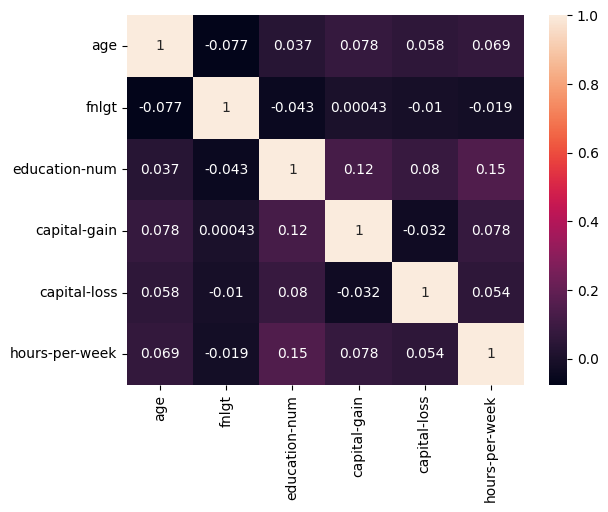

In [3]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix = census_data.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [4]:
pd.get_dummies(census_data['salary'])

,<=50K,>50K
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
32556,1,0
32557,0,1
32558,1,0
32559,1,0


In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz


labelencoder=LabelEncoder()
for column in census_data.columns:
    census_data[column] = labelencoder.fit_transform(census_data[column])


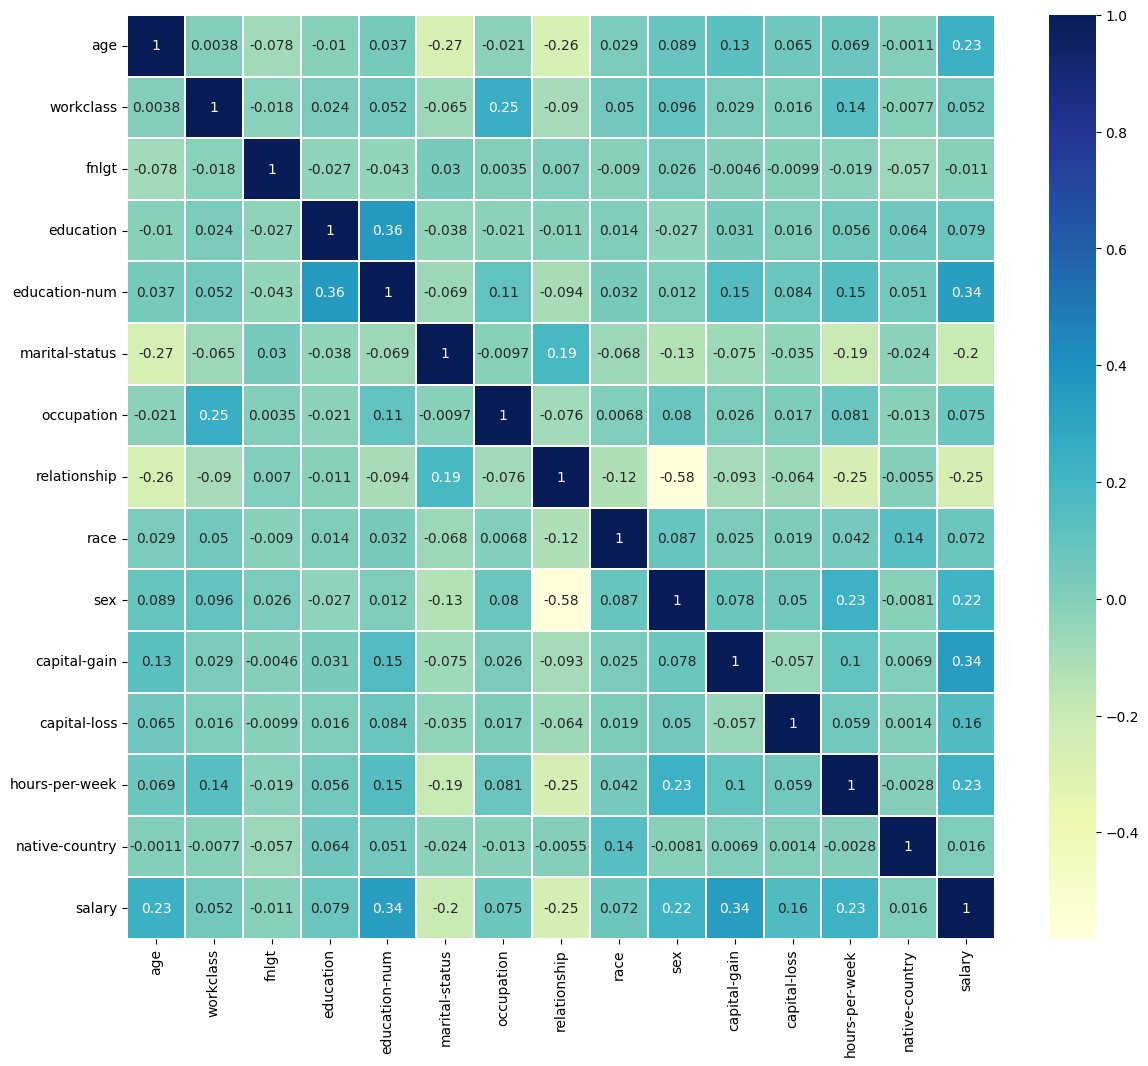

In [7]:
plt.figure(figsize=(14,12))
sns.heatmap(census_data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);